# Jupyter notebook template

This is a template file to start from.

 - First, import some stuff

In [54]:
#Annoying folder stuff
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Import plotting and numpy
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

# Import vortex panel and boundary layer functions
from vortexpanel import VortexPanel as vp
from vortexpanel import BoundaryLayer as bl

 - Then you can do whatever you want by typing, coding, or adding equations
 
$$ E = mc^2 $$

In [55]:
# This is a code cell
print([i**2 for i in range(10)])

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Use help() to gain info on the functions

In [56]:
help(vp.panelize)

Help on function panelize in module vortexpanel.VortexPanel:

panelize(x, y)
    Create a PanelArray from a set of points
    
    Inputs:
    x,y    -- the x and y location of the panel end points
    
    Outputs:
    A PanelArray object
    
    Note:
    The first and last point should match for a
    closed shape.



Example on how to use vp.panelize()

(-0.05, 1.05, -0.05, 1.05)

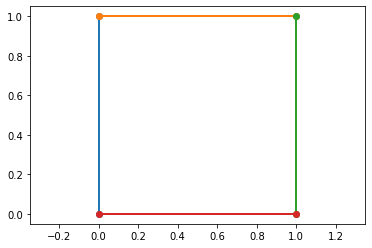

In [57]:
x = [0,0,1,1,0]
y = [0,1,1,0,0]
square = vp.panelize(x,y)
square.plot(style='o-')
plt.axis('equal')

In [58]:
help(vp.PanelArray.plot)


Help on function plot in module vortexpanel.VortexPanel:

plot(self, style='k', nlabel=0)
    Plot the PanelArray panels
    
    Inputs:
    style -- a string defining the matplotlib style
    nlabel -- add every 'nlabel' panel index labels
    
    Example:
    circle = vp.make_circle(N=32) # make a circle PanelArray
    circle.plot(style='o-')       # plot the geometry



Personal Attempt on making a circle

In [59]:
def make_circle(radius, n):
    wedge_angle = 2*np.pi/(n)
    x = []
    y = []
    for i in range(n):
        x.append(radius*np.sin(i*wedge_angle))
        y.append(radius*np.cos(i*wedge_angle))
    x.append(x[0])
    y.append(y[0])
    return vp.panelize(x,y)

    

(-1.1, 1.1, -1.1, 1.1)

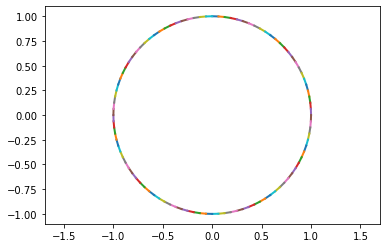

In [60]:
circle = make_circle(radius=1, n=100)
circle.plot(style = '-')
plt.axis('equal')

Gabe's solution to making a circle

(-1.1, 1.1, -1.1, 1.1)

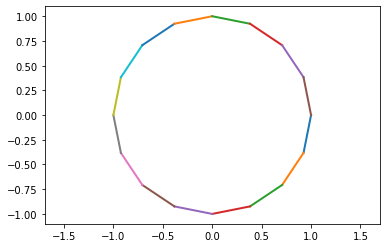

In [61]:
def make_circle(N, radius=1):
    theta=np.linspace(2*np.pi,0,N+1)
    x = radius*np.cos(theta)
    y = radius*np.sin(theta)
    return vp.panelize(x,y)

circle=make_circle(N=16)
circle.plot(style='-')
plt.axis('equal')

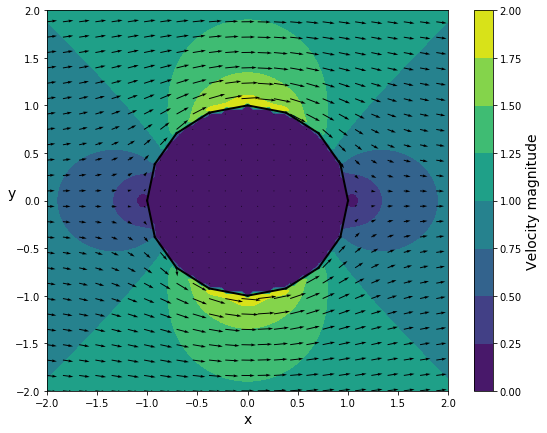

In [62]:
circle.solve_gamma()
circle.plot_flow()

**QUANTATIVE TESTING**

get_array will return any of the data in the shape. 
distance is the summation of 'S' over the whole shape

In [63]:
circle.get_array('gamma')
circle.get_array('S')
circle.distance()

array([0.19509032, 0.58527097, 0.97545161, 1.36563225, 1.7558129 ,
       2.14599354, 2.53617419, 2.92635483, 3.31653547, 3.70671612,
       4.09689676, 4.48707741, 4.87725805, 5.26743869, 5.65761934,
       6.04779998])

Text(0, 0.5, '$\\gamma/U$')

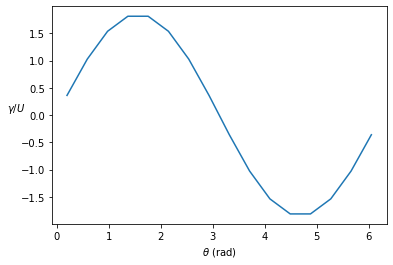

In [64]:
gamma=circle.get_array('gamma')
s = circle.distance()
plt.plot(s,gamma)
plt.xlabel(r'$\theta$ (rad)');plt.ylabel(r'$\gamma/U$', rotation=0)

Validation means that the numbers are correct. Comparing the result to a *known solution*. Potential flow around a circle has an analytical solution (from class).

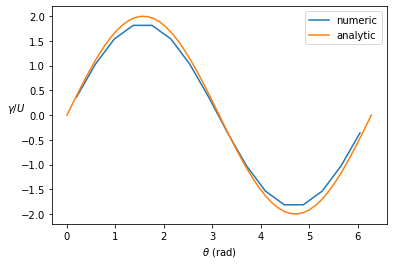

In [65]:
gamma=circle.get_array('gamma')
s = circle.distance()
plt.plot(s,gamma,label='numeric')
theta=np.linspace(0,2*np.pi)
plt.plot(theta,2*np.sin(theta),label='analytic')
plt.xlabel(r'$\theta$ (rad)');plt.ylabel(r'$\gamma/U$', rotation=0);plt.legend()

Note that the peak doesn't match, and gets worse as the 'resolution' of the numerical circle decreases. 
**Convergance**
A numerical method should converge to a known solution with increasing resolution.

**Group coding activity**

1) Write a function to get the maximum numericalerror on the circle for a given number of panels $N$

2) plot how error depends on $N$

(Text(0.5, 0, 'Number of panels $N$'),
 Text(0, 0.5, 'Numerical Method Error $\\%$'))

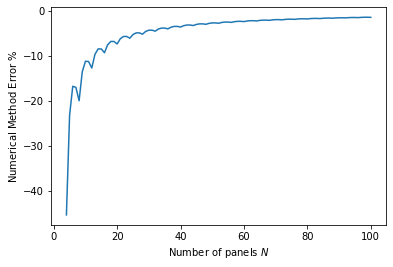

In [74]:
def max_error(N):
    circle=make_circle(N)
    circle.solve_gamma()
    gamma=circle.get_array('gamma')
    return ((max(gamma) - 2)*100)/2

N = range(4,101)
error = [max_error(N) for N in N]
plt.plot(N, error)
plt.xlabel(r'Number of panels $N$'),plt.ylabel(r'Numerical Method Error $\%$')